# Email Filtering or Email Categorization or Email Classification:
Email classification, often referred to as email filtering or email categorization, is the process of automatically classifying incoming emails into different categories based on their content, characteristics, or sender information. One common use case of email classification is distinguishing between spam (unwanted or unsolicited emails) and legitimate emails (not spam).


Data Collection and Preparation:

Gather a large dataset of emails that includes examples of both spam and non-spam (ham) emails. This dataset will be used for training and testing your classification model.

Feature Extraction:

Extract relevant features from the emails. Features could include the email's subject, sender, recipient, message body, attachments, and any other attributes that might be informative for classification.

Data Labeling:

Manually label each email in your dataset as either spam or not spam. This is typically done during the data preparation phase.

Data Preprocessing:

Clean and preprocess the text data. This involves tasks like removing HTML tags, converting text to lowercase, removing punctuation, and tokenization.

Feature Engineering:

Transform the extracted features into a numerical format suitable for machine learning algorithms. Common techniques include **TF-IDF (Term Frequency-Inverse** **Document Frequency) vectorization or word embeddings** like **Word2Vec or GloVe**.

Model Selection:

Choose a machine learning algorithm or model for email classification. Common choices include:

- Naive Bayes classifiers

- Support Vector Machines (SVM)

- Decision Trees and Random Forests

- Neural Networks (e.g., LSTM or CNN for text classification)

Model Training:

Split your labeled dataset into a training set and a testing set (or use cross-validation). Train your chosen model on the training data.

Model Evaluation:

Evaluate the performance of your model using appropriate evaluation metrics like accuracy, precision, recall, F1-score, and AUC-ROC. Adjust the model and its hyperparameters as needed to improve performance.

Deployment:

Once you have a well-performing model, integrate it into your email system. Incoming emails can be automatically classified as spam or not spam based on the model's predictions.

Feedback Loop:

Continuously monitor the performance of your email classification system. Collect user feedback and use it to improve the model and adapt to new spamming techniques.

Threshold Adjustment:

Set a classification threshold to determine when an email is classified as spam. This threshold can be adjusted to control false positives and false negatives based on the specific requirements of your system.

Maintenance:

Periodically retrain your model with fresh data to keep it up to date with evolving email patterns and spamming techniques.
Email classification systems are essential for managing email inboxes, reducing the impact of spam, and ensuring that legitimate emails are not mistakenly classified as spam. They play a crucial role in enhancing email security and user experience.

Creating a complete email categorization system is a complex task that involves several components and may require integration with email servers or APIs, natural language processing libraries, and machine learning models. Below, I'll provide a high-level overview of the steps and code snippets for each component involved in building such a system using Python. Please note that this is a **simplified example**, and you may need to adapt and extend it to meet your specific requirements.


Data Collection: You'll need a source of emails to categorize. You can collect emails from a mailbox, a database, or use a dataset. For this example, let's assume you have a dataset in **CSV format with columns "Subject" and "Body"**.

Preprocessing: Preprocess the email data by cleaning and preparing it for analysis. This may include tokenization, removing stop words, and stemming or lemmatization.



**Integration with Email System**: For a production system, you would need to integrate this code with your email server or email client to automatically categorize incoming emails. The integration process will depend on your email system.



 our **email_data.csv** is very small corpus and  its contain just 6 email with different part (Subject,Body,Category) :
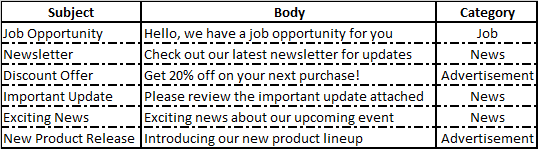




In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download("stopwords")
nltk.download("punkt")

# Load your dataset
df = pd.read_csv("email_data.csv")

# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]

    # Apply stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return " ".join(words)

# Preprocess the email data
df["Processed_Text"] = df["Subject"] + " " + df["Body"]
df["Processed_Text"] = df["Processed_Text"].apply(preprocess_text)


# Print the preprocessed data
print(df.head())


            Subject                                         Body  \
0   Job Opportunity     Hello, we have a job opportunity for you   
1        Newsletter  Check out our latest newsletter for updates   
2    Discount Offer           Get 20% off on your next purchase!   
3  Important Update  Please review the important update attached   
4     Exciting News       Exciting news about our upcoming event   

        Category                                 Processed_Text  
0            Job              job opportun hello , job opportun  
1           News           newslett check latest newslett updat  
2  Advertisement         discount offer get 20 % next purchas !  
3           News  import updat pleas review import updat attach  
4           News              excit news excit news upcom event  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Feature Extraction: Convert the text data into numerical features using techniques like TF-IDF
# (Term Frequency-Inverse Document Frequency) or word embeddings.

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform the processed text data into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df["Processed_Text"])


In [4]:
# for ML model You can use algorithms like Naive Bayes, Random Forest, or a neural network.
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, df["Category"], test_size=0.2, random_state=42
)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Accuracy: 0.5 ---> becouse our corpus was very very samll just 6 email.

Accuracy: 0.5


In [5]:
# Email Categorization: Use the trained model to categorize new emails

# Example email content
new_email = """Subject: Invitation to Our Event
Body:
Dear recipient,

We are excited to invite you to our upcoming event. It promises to be an exciting evening filled with entertainment and surprises.

Date: January 20, 2024
Time: 6:00 PM
Location: 123 Main Street

We look forward to seeing you there!

Best regards,
Your Event Team
"""

# Preprocess and extract features from the new email
new_email_processed = preprocess_text(new_email)
new_email_vector = tfidf_vectorizer.transform([new_email_processed])

# Predict the category of the new email
predicted_category = nb_classifier.predict(new_email_vector)[0]
print(f"Predicted category for the new email: {predicted_category}")


Predicted category for the new email: News
